## Outlier detection.

In this task you will be given a dataset of credit card transactions, small proportion 
of which is identified as fraudulent (see *data description.txt*). Since there are too few frauds and too many regular transactions, standard classification methods are not directly appliccable. But since frauds are untypical you may use outlier detection methods to identify them.

In this task you need to identify the best outlier detection method with best parameters to detect frauds out of three outlier detection methods offered in sklearn. Quality metric is area-under-curve (AUC).

In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
import sklearn
import sklearn as skl
import pandas as pd
from pdb import set_trace as bp

In [3]:
np.set_printoptions(linewidth=140,edgeitems=10)
rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
from common.classes.Struct import Struct
from common.visualize.colors import COLORS
from common.visualize.data import plot_corr
from common.visualize.distributions import cont_dist_classification, pca_2D, cross_distributions
from common.visualize.distributions import cross_distributions_classification, cross_distributions_regression

ImportError: cannot import name 'pca_2D'

### Data preparation

In [6]:
Z=pd.read_csv('data.csv')

In [18]:
label = []
for ind, ser in Z.iterrows():
    clazz = ser.get("Class")
    clazz = int(clazz)
    if clazz == 0:
        label.append("Regular")
    else:
        label.append("Fraud")
        
Z["Label"] = label
Z["Hour"] = round(Z.Time / 3600) % 24

In [22]:
Z.head(n=20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Regular,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Regular,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Regular,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Regular,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Regular,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,Regular,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,Regular,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,Regular,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,Regular,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,Regular,0.0


In [9]:
Z.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
random.seed(0)
inds = random.permutation(arange(len(Z)))

Z=Z.loc[inds]

Z.index = arange(len(Z))

In [24]:
inds0 = find(Z['Class'].values==0)
inds1 = find(Z['Class'].values==1)

# for simplicity of computations consider subset of original sample.
inds0 = inds0[:len(inds0)//3]
inds1 = inds1[:len(inds1)//3]

inds = hstack( [inds0, inds1] ) 
random.seed(0)
inds = random.permutation(inds)

Z=Z.loc[inds] # to simplify future computations

In [25]:
len(Z)

94935

In [26]:
Z.Class.value_counts()

0    94771
1      164
Name: Class, dtype: int64

In [27]:
Z.index = arange(len(Z))

In [28]:
features = ['V%d'%i for i in arange(1,28+1)]

In [29]:
X = Z[features].values
Y = Z['Class'].values

In [30]:
len(X), len(Y)

(94935, 94935)

In [31]:
time=Z.Time.values

#### Plot distribution of the total number of transactions. Does it have any day/night pattern?

In [34]:
def draw_dest_tr(time_np):
    time_in_hours = time_np/3600
    plt.hist(time_in_hours)
    plt.xlabel("Hours")
    plt.ylabel("Amount")
    plt.title("Destribution transaction cross time")
    plt.show()

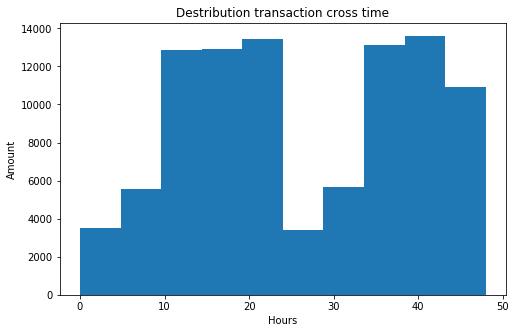

In [33]:
draw_dest_tr(time)

As we can observe from the histogram above intensive of transactions has period. Because of we do not know time of the first transaction we can not asnwer on what part of day there is a peak of transactions.

#### Plot distribution of the fraudulent number of transactions. Does it have any day/night pattern?

In [32]:
fraud_transaction = Z[Z.Class == 1]

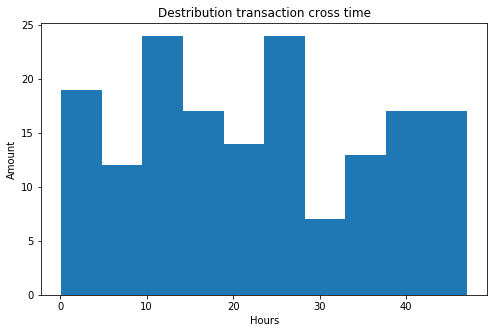

In [35]:
draw_dest_tr(fraud_transaction.Time.values)

As we can see from the plot fraud transactions do not have time pattern

### Train, test sets

In [36]:
train_inds = find(time<86400) # train - previous day
test_inds = find(time>=86400) # test - next day

## Data visualizations

Should be performed on **train set only**

#### Estimate class proportions

In [37]:
train_df = Z.iloc[train_inds]
test_df = Z.iloc[test_inds]

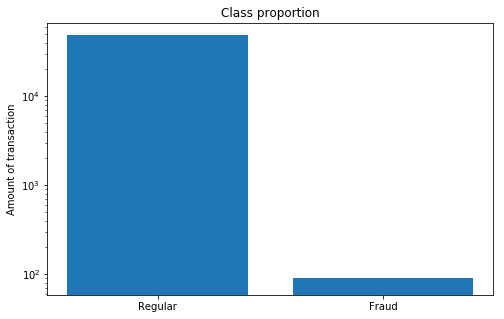

In [54]:
amount_fraud_tran_int = len(train_df[train_df.Class == 1])
amount_reqular_tran_int = len(train_df) - amount_fraud_tran_int
plt.bar([0,1], [amount_reqular_tran_int, amount_fraud_tran_int], tick_label=["Regular", "Fraud"], log=True)
plt.ylabel("Amount of transaction")
plt.title("Class proportion")
plt.show()

In [56]:
print( "Ration fraud to regular transaction = " + str(amount_fraud_tran_int/ amount_reqular_tran_int))

Ration fraud to regular transaction = 0.0018688483741019146


#### Plot distributions $p(f|y=0), p(f|y=1)$ of all features f.

$p(f|y=0), p(f|y=1)$ should lie on one graph and different f should belong to different graphs.

Useful function: common.vizualize.distributions.cont_dist_classification

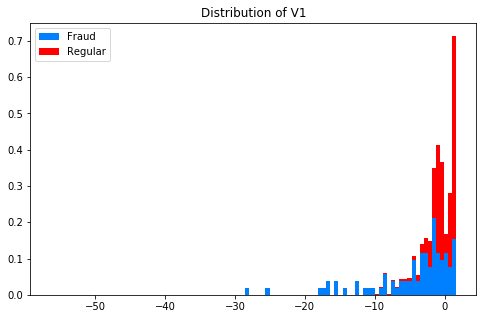

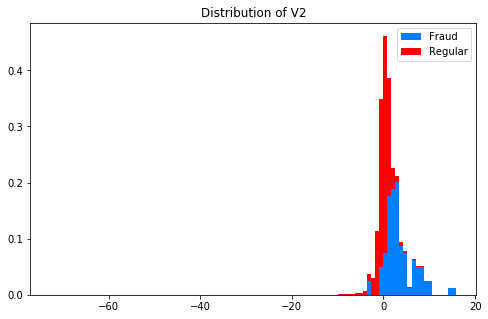

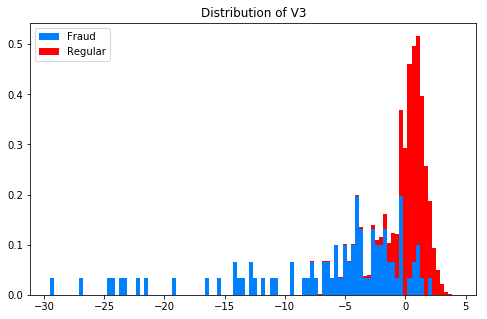

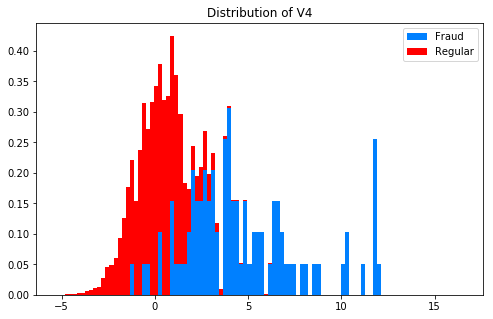

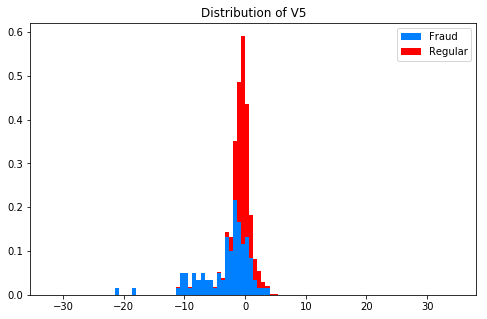

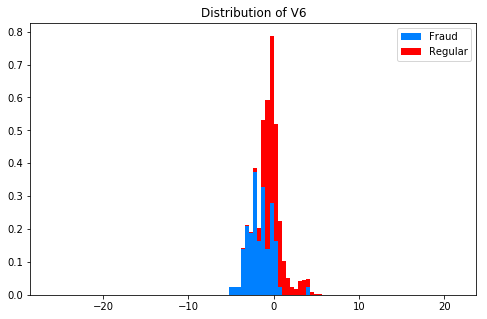

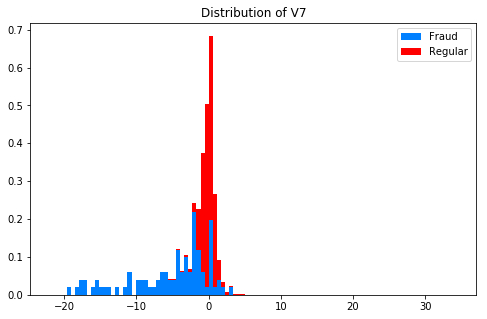

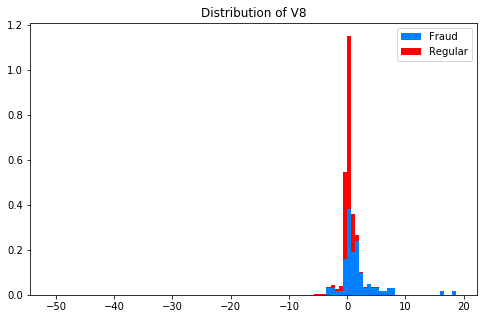

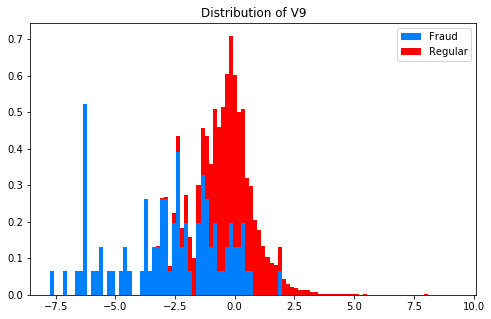

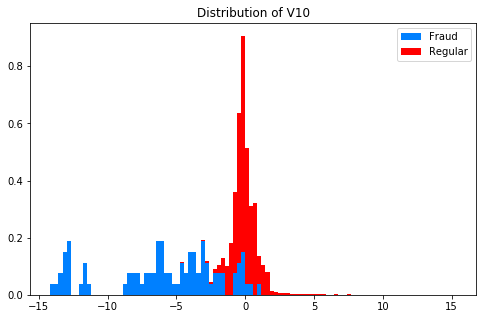

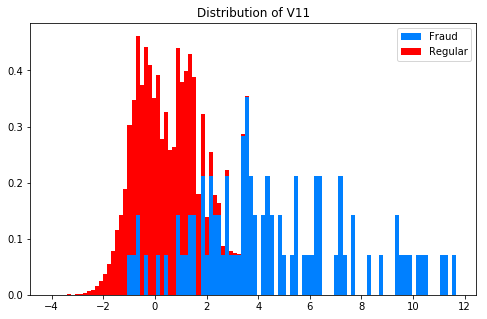

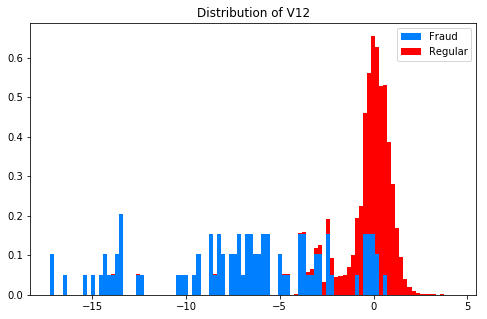

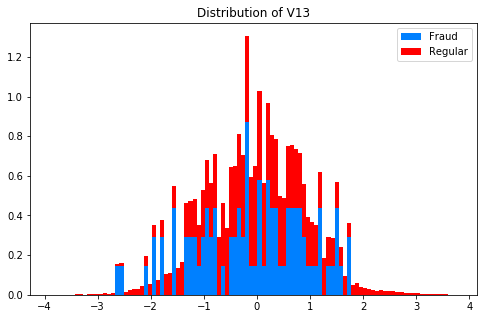

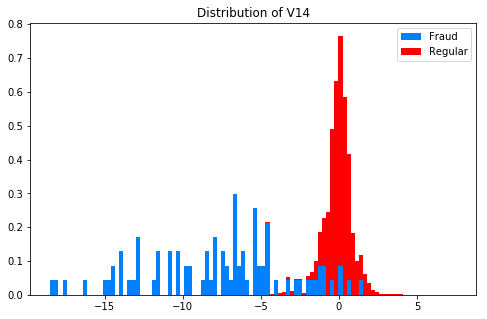

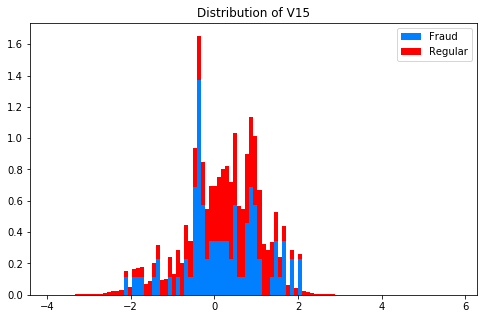

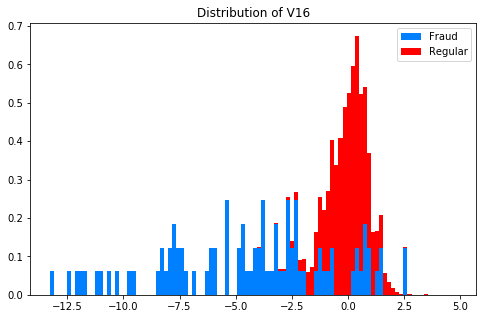

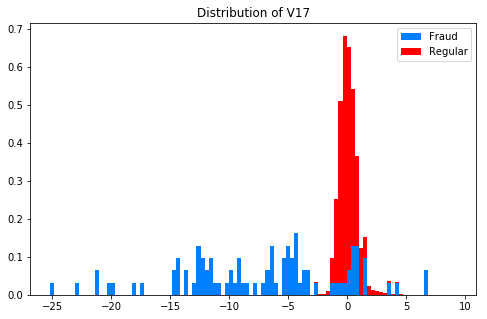

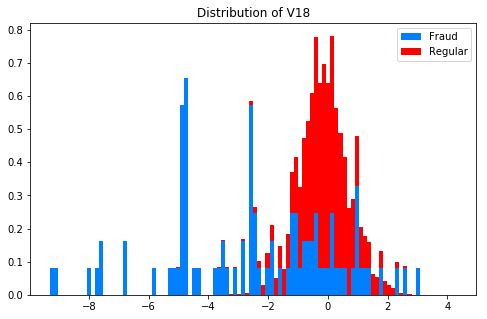

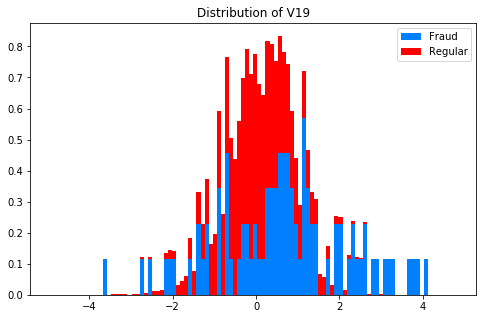

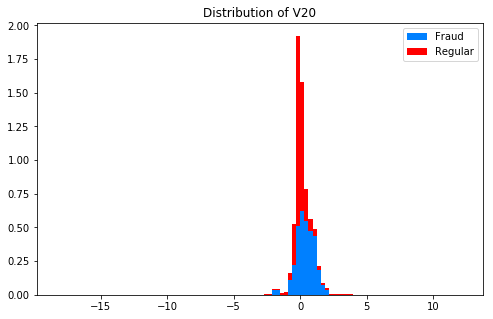

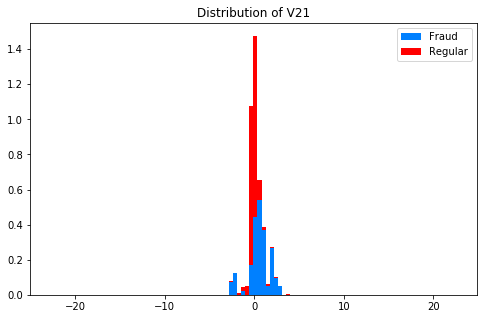

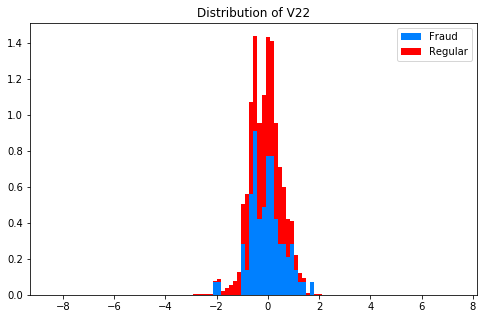

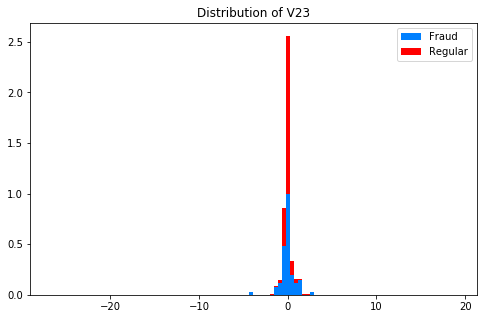

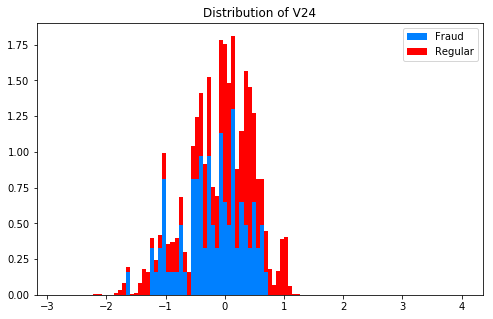

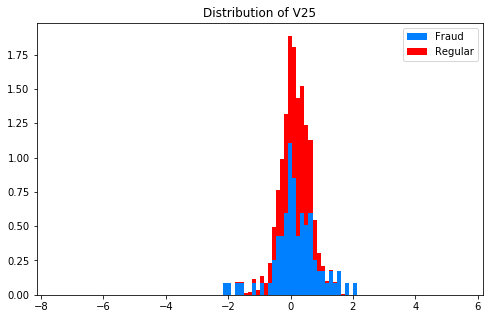

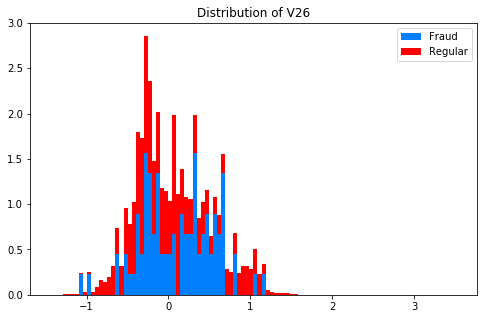

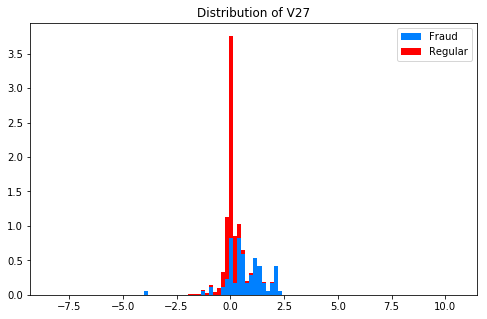

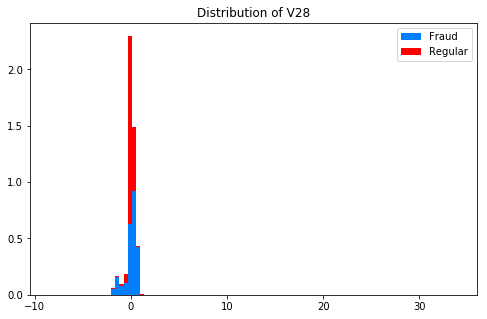

In [71]:
for i in range(1,29):
    name = "V" + str(i)
    cont_dist_classification(train_df[name], train_df.Label, feature_name=name)
    plt.show()

#### Redraw the graph above for some very discriminative feature. Title it with feature name.

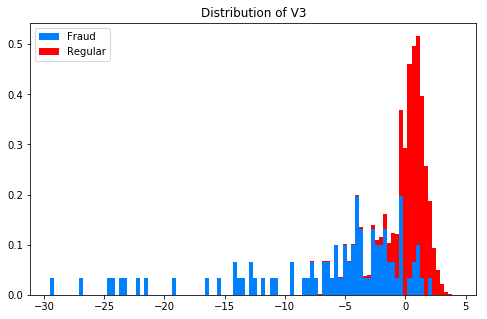

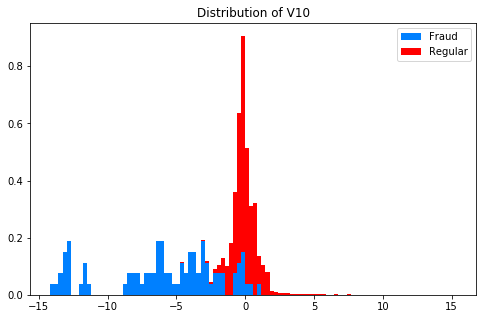

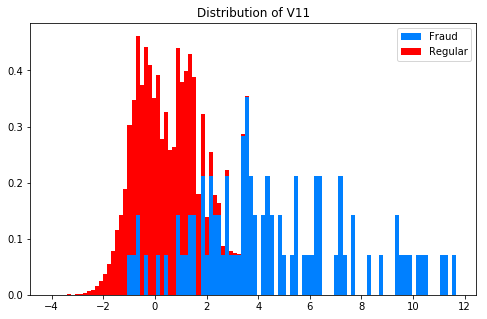

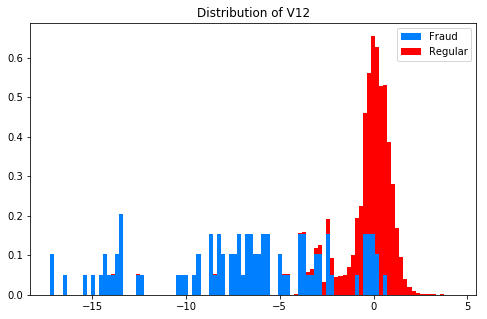

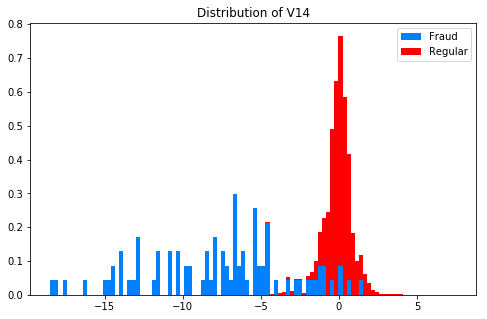

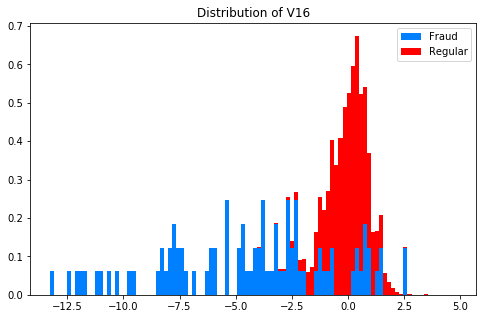

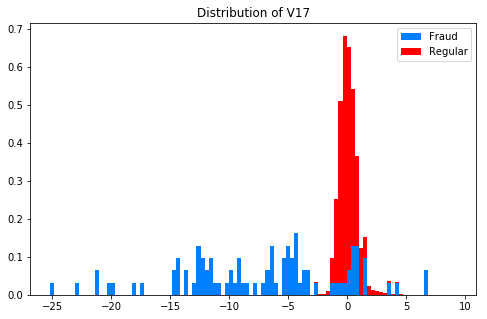

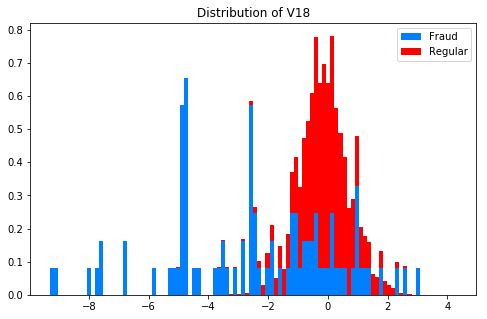

In [72]:
for i in [3,10,11,12,14,16,17,18]:
    name = "V" + str(i)
    cont_dist_classification(train_df[name], train_df.Label, feature_name=name)
    plt.show()

#### Redraw the graph above for some least discriminative feature. Title it with feature name.

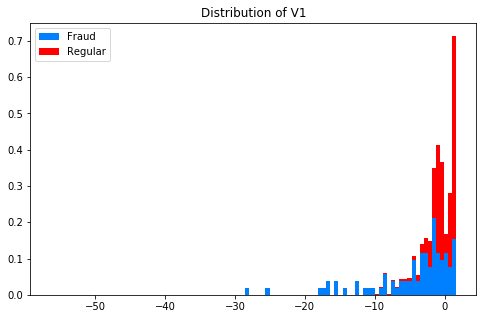

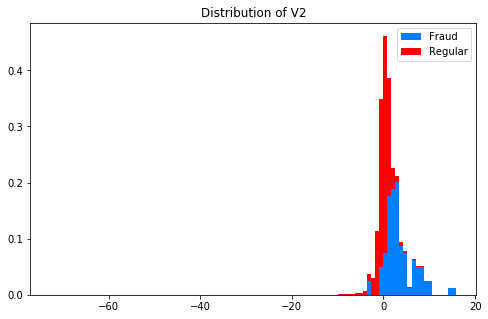

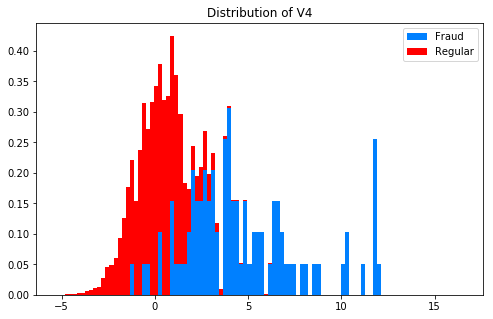

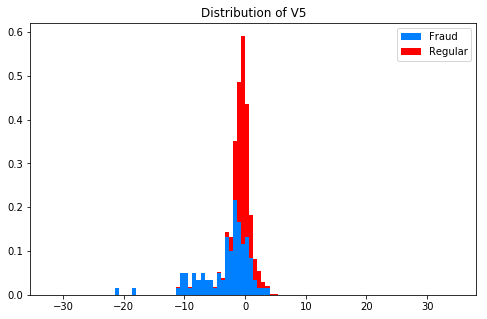

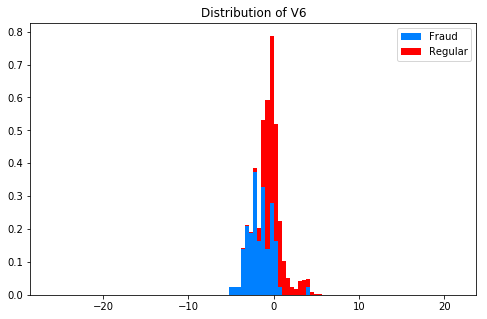

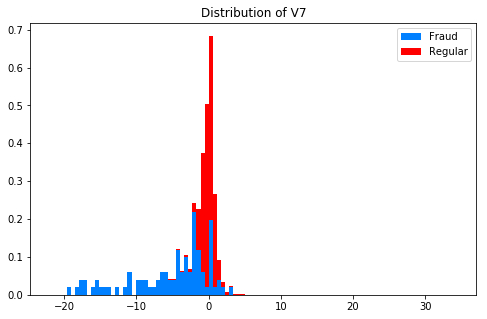

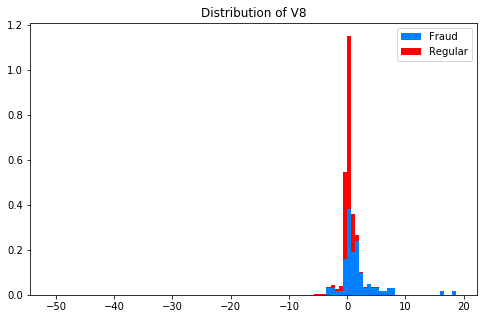

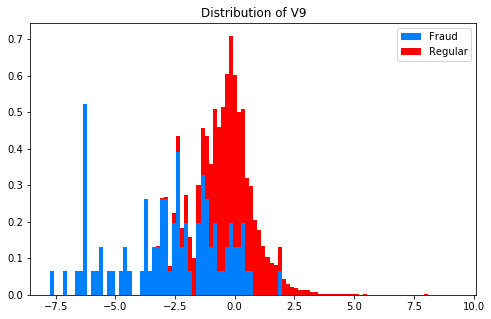

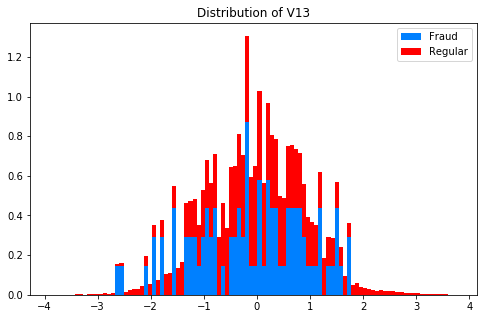

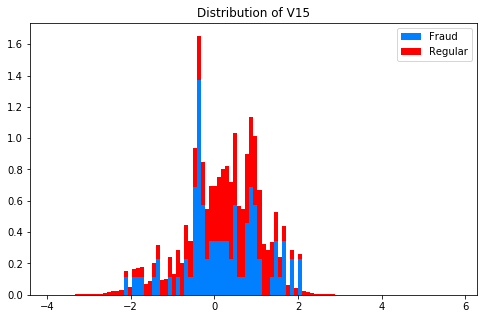

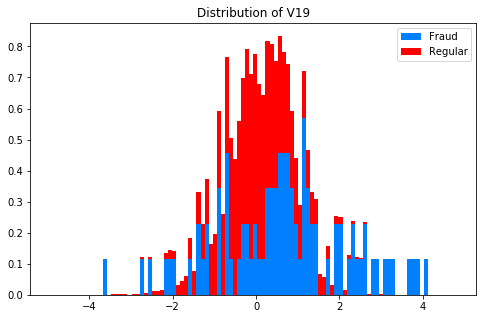

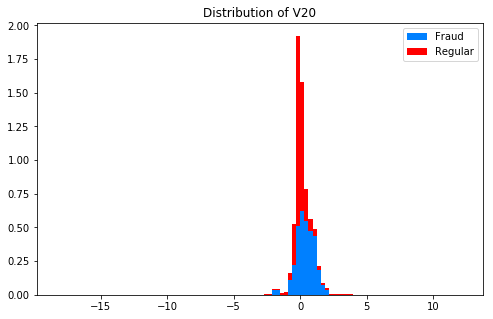

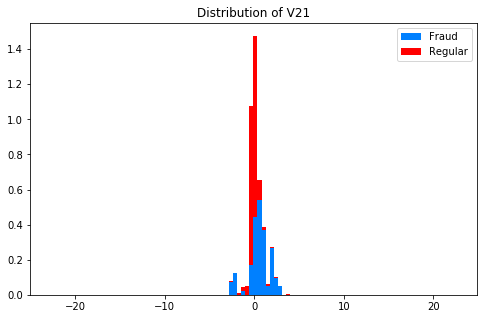

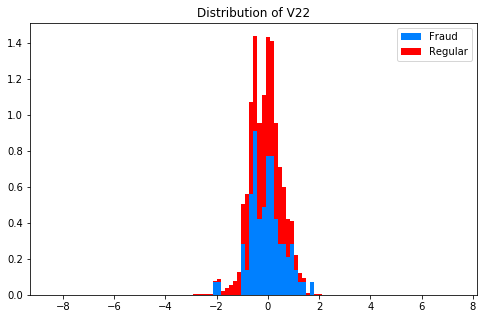

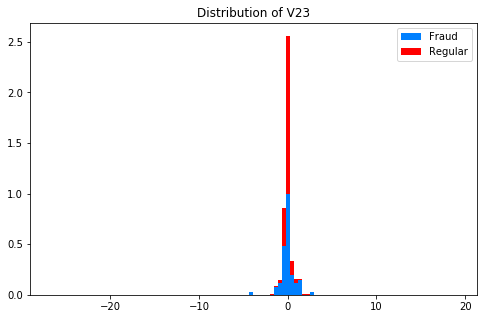

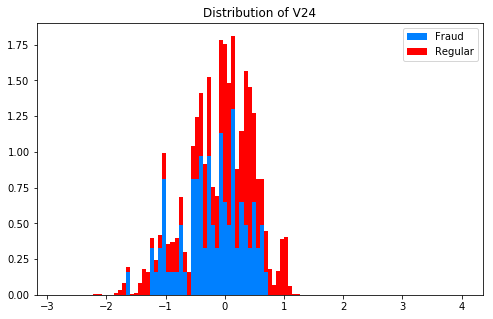

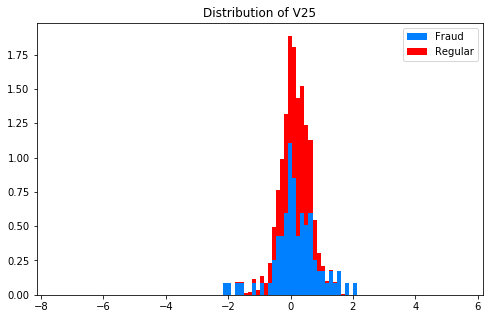

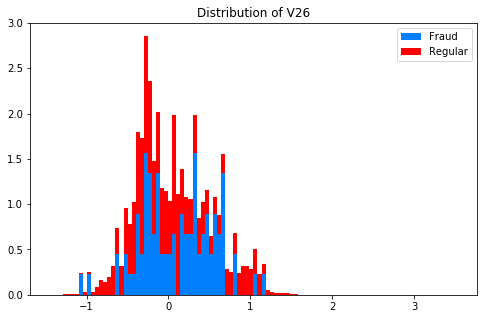

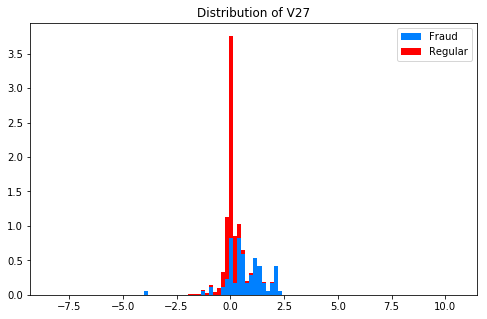

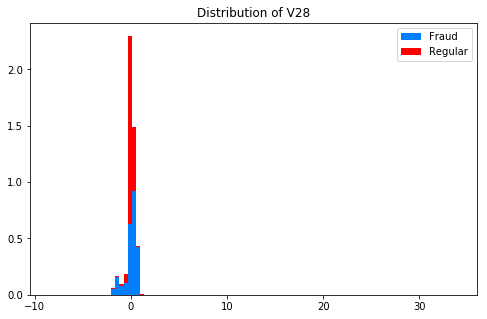

In [73]:
for i in [1,2,4,5,6,7,8,9,13,15,19,20,21,22,23,24,25,26,27,28]:
    name = "V" + str(i)
    cont_dist_classification(train_df[name], train_df.Label, feature_name=name)
    plt.show()

### Plot data in first 2 principal component space
Useful function: common.visualize.cross_distributions.pca_2D
    
Are frauds separable?

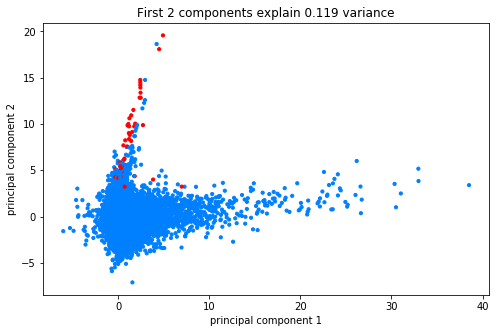

In [84]:
column = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

pca_2D(train_df[column].values, train_df.Class,task="classification")

Base on observation above we can not clear separate fraud transactions. If we separete it we will also touch some reqular transaction. But may be it is better then lose money.

#### Plot correlations between features.

Useful function: common.visualize.data.plot_corr

What regularities do you see? 

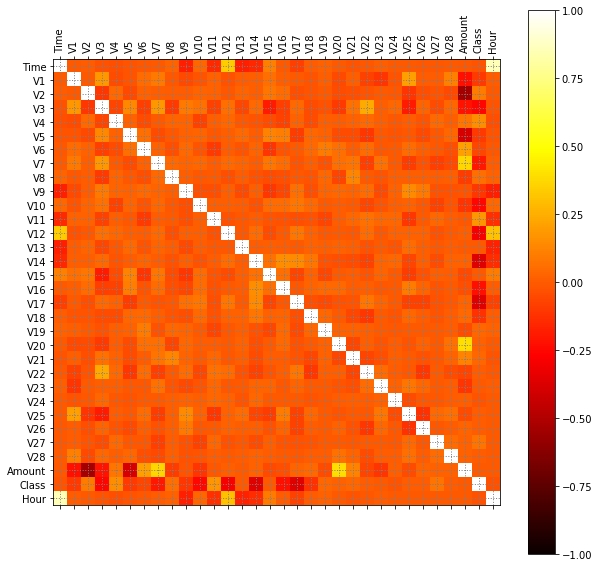

In [98]:
plot_corr(train_df)

We can observe next strong correlations:
<ol>
<li>V2-Amount</li>
<li>V3-Amount</li>
<li>V6-Amount</li>
<li>V20-Amount</li>
<li>Time-V9</li>
<li>Time-V11</li>
<li>Time-V12</li>
<li>Time-V13</li>
<li>Time-V14</li>
</ol>

# Anomaly detection

Below you need to compare outlier detectin methods, using the following scheme:
    1. find optimal parameters with GridSearchCV with default number of folds on TRAIN SET
       Set n_jobs=1 (GridSearchCV may not work otherwise).
    2. display best parameters
    3. apply method with best parameters to TEST SET
    4. show ROC curve for TEST SET with title 'AUC=<value>', where <value> is estimated AUC value.

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import IsolationForest

#### GridSearchCV should use everywhere scoring=my_auc_score defined below.

Y_hat is the **score**, showing how much an object looks like an outlier. So **predict** methods should **return scores, not classes.**

To obtain such predict method, you will need to redefine (by inheritance) original scikit-learn methods.

Don't confuse object outlier score with object normality score.

In [39]:
from sklearn.metrics import make_scorer

def my_auc(Y,Y_hat):
    fpr,tpr,_ = roc_curve(Y, Y_hat, pos_label=1)
    return auc(fpr, tpr)

my_auc_score = make_scorer(my_auc, greater_is_better=True)

### LocalOutlierFactor method

#### Show best parameters on train set.

Consider grid {'n_neighbors':[1,3,7],'p':[1,2]}

<b>GridSearchCV</b> does not support LocalOutlierFactor

In [40]:
column = ['Hour', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [64]:
def get_labels(classes_np):
    label_np=classes_np.copy()
    for ind in range(0, label_np.shape[0]):
        value = int(label_np[ind])
        if value == 0:
            label_np[ind] = 1
        else:
            label_np[ind] = -1
    return label_np
    
def my_grid(df, classes):
    label_np=get_labels(classes)
    
    max_auc = -1
    res = [-1] * 4
    for neibours in [1,3,7]:
        for p in [1,2]:
            print("NN: {0} | p: {1}".format(neibours, p))
            local = LocalOutlierFactor(n_neighbors=neibours, p=p)
            y_pred = local.fit_predict(df)
            sq = my_auc(label_np,y_pred)
            print("Square: {0}".format(sq))
            if sq > max_auc:
                max_auc = sq
                res[0] = neibours
                res[1] = p
                res[2] = max_auc
                res[3] = local
    print("Best parameters: NN: {0} | p: {1}| Score: {2}".format(res[0], res[1], res[2]))
    return res

In [60]:
res = my_grid(train_df[column], train_df.Class.values)

NN: 1 | p: 1
Square: 0.5556573039670344
NN: 1 | p: 2
Square: 0.5890529322461712
NN: 3 | p: 1
Square: 0.6280144985718308
NN: 3 | p: 2
Square: 0.6669760648974903
NN: 7 | p: 1
Square: 0.5890529322461712
NN: 7 | p: 2
Square: 0.644712312711399
Best parameters: NN: 3 | p: 2| Score: 0.6669760648974903


#### Show quality on test set.

In [84]:
model = res[3]
y_pred = model._predict(test_df[column])
y_true = get_labels(test_df.Class.values)
sq = my_auc(y_true,y_pred)
print("AUC: {0}".format(sq))

AUC: 0.6384872043003895


### EmpiricalCovariance method

#### Since method does not have tunable parametes, just show its ROC & AUC on test set.

In [67]:
emp_model = EmpiricalCovariance()
emp_model.fit(train_df[column])
test_score = emp_model.score(test_df[column])

In [68]:
test_score

-53.233528

### IsolationForest method

#### Show best parameters on train set

In [81]:
forest = IsolationForest()
params = {
    "n_estimators":[25, 50, 100, 150, 200],
    "contamination": [0.1, 0.00186]
         }
y_true = get_labels(train_df.Class.values)
grid = GridSearchCV(forest, param_grid=params, verbose=100, scoring=my_auc_score)
grid.fit(train_df[column], y_true)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] contamination=0.1, n_estimators=25 ..............................
[CV]  contamination=0.1, n_estimators=25, score=0.8779420666571713, total=   0.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[CV] contamination=0.1, n_estimators=25 ..............................
[CV]  contamination=0.1, n_estimators=25, score=0.8165274191462147, total=   0.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[CV] contamination=0.1, n_estimators=25 ..............................
[CV]  contamination=0.1, n_estimators=25, score=0.9159314941669512, total=   0.6s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s
[CV] contamination=0.1, n_estimators=50 ..............................
[CV]  contamination=0.1, n_estimators=50, score=0.8928197550206523, total=   1.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s
[CV] co

GridSearchCV(cv=None, error_score='raise',
       estimator=IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25, 50, 100, 150, 200], 'contamination': [0.1, 0.00186]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(my_auc), verbose=100)

In [82]:
print("Best parameters:")
print(grid.best_params_)

Best parameters:
{'contamination': 0.1, 'n_estimators': 100}


#### Show quality on test set.

Does the quality increase with increase of **n_estimators**?

No, after 100 estimators accuracy does not become better

In [83]:
estimator = grid.best_estimator_
y_true = get_labels(test_df.Class.values)
y_pred = estimator.predict(test_df[column])
result = my_auc(y_true, y_pred)
print("AUC: " + str(result))

AUC: 0.884984527574
